In [11]:
import numpy as np
import matplotlib.pyplot as plt
import json
import statistics
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("seaborn-whitegrid")


In [12]:
def get_wasm_experiment_results(result_files):
    
    results = {}
    
    for file_path in result_files:
        rate = file_path.split("/")[1].split("_")[0]
        with open(file_path, 'r') as file:
            results[rate] = json.load(file)
    
    return results
        

In [13]:
func = 'whatlang'
arrival_rates_wasm = [0.5, 5.0] + [float(x) for x in range(10,900,10)]
wasm_result_files = [f"wasm_{func}/{rate}_results.json" for rate in arrival_rates_wasm]
spin_results = get_wasm_experiment_results(wasm_result_files)
wasm_service_time = 0.0317

In [14]:
spin_results

{'0.5': {'Avg_response_time': 0.028629310925801597,
  'Avg_inflight_executors': 0.027932960893854553},
 '5.0': {'Avg_response_time': 0.030353475941552056,
  'Avg_inflight_executors': 0.14525139664804465},
 '10.0': {'Avg_response_time': 0.030912077162000867,
  'Avg_inflight_executors': 0.25139664804469275},
 '20.0': {'Avg_response_time': 0.03166735337840186,
  'Avg_inflight_executors': 0.6404494382022472},
 '30.0': {'Avg_response_time': 0.031098262557276973,
  'Avg_inflight_executors': 0.8370786516853932},
 '40.0': {'Avg_response_time': 0.031110366980234783,
  'Avg_inflight_executors': 1.3163841807909606},
 '50.0': {'Avg_response_time': 0.030407615661621094,
  'Avg_inflight_executors': 1.3446327683615817},
 '60.0': {'Avg_response_time': 0.030372735063234964,
  'Avg_inflight_executors': 1.8465909090909092},
 '70.0': {'Avg_response_time': 0.029895034990613422,
  'Avg_inflight_executors': 2.0738636363636367},
 '80.0': {'Avg_response_time': 0.02976588519083129,
  'Avg_inflight_executors': 2

## Plotting Mean Response Times

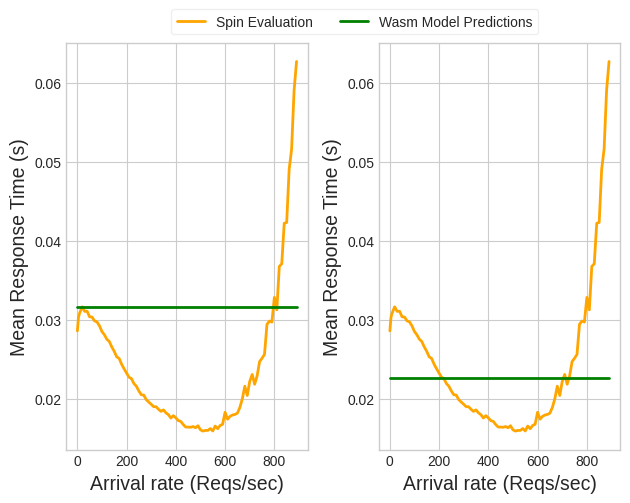

In [17]:
#plt.figure(figsize=(10, 6))

# spin_resp_times = [v["Avg_response_time"] for k,v in spin_results.items()]
# #print(spin_resp_times)


# plt.plot(arrival_rates_wasm, spin_resp_times, color='orange', label="Spin Evaluation", linewidth=2)
# plt.plot(arrival_rates_wasm, [wasm_service_time]*len(arrival_rates_wasm), color='green', label="Wasm Model Predictions", linewidth=2)

# plt.xlabel('Arrival rate (Reqs/sec)', fontsize=14)
# plt.ylabel('Mean Response Time (s)', fontsize=14)


# plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.2),
#            frameon=True, framealpha=0.3)

#plt.savefig(f"figures/load_mean_response_time.png", bbox_inches = 'tight', dpi=300)


wasm_mean_service_time = np.mean(spin_resp_times[:-5])

fig, axs = plt.subplots(1, 2)

axs[0].plot(arrival_rates_wasm, spin_resp_times, color='orange', label="Spin Evaluation", linewidth=2)
axs[0].plot(arrival_rates_wasm, [wasm_service_time]*len(arrival_rates_wasm), color='green', label="Wasm Model Predictions", linewidth=2)

axs[0].set_xlabel('Arrival rate (Reqs/sec)', fontsize=14)
axs[0].set_ylabel('Mean Response Time (s)', fontsize=14)


axs[1].plot(arrival_rates_wasm, spin_resp_times, color='orange', label="Spin Evaluation", linewidth=2)
axs[1].plot(arrival_rates_wasm, [wasm_mean_service_time]*len(arrival_rates_wasm), color='green', label="Wasm Model Predictions", linewidth=2)

axs[1].set_xlabel('Arrival rate (Reqs/sec)', fontsize=14)
axs[1].set_ylabel('Mean Response Time (s)', fontsize=14)
plt.tight_layout()



plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(-0.1, 1.1),
           frameon=True, framealpha=0.3)

plt.savefig(f"figures/load_whatlang_wasm_response_time.png", bbox_inches = 'tight', dpi=300)




## Plotting Total Running Executor Count

0.022671890722437246


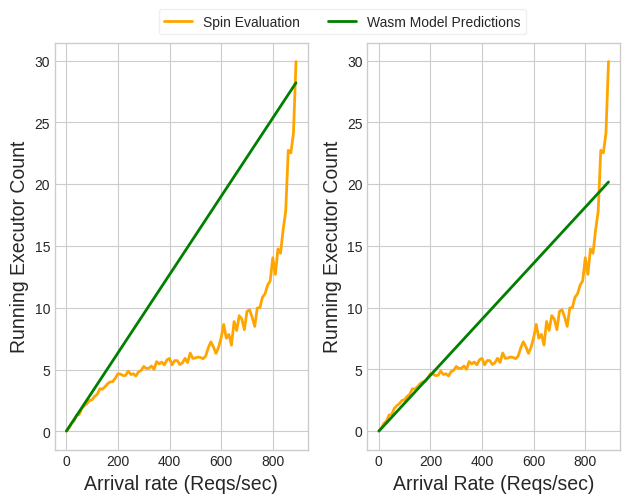

In [19]:
#plt.figure(figsize=(10, 6))
# exp_running_total = container_results["OpenWhisk"]["running_total"].values()
# model_running_total = container_results["Model"]["running_total"].values()


# spin_execs = [v["Avg_inflight_executors"] for k,v in spin_results.items()]
# wasm_execs = [rate * wasm_service_time for rate in arrival_rates_wasm]

# # plt.plot(arrival_rates_cont, exp_running_total, color='red', label="OpenWhisk Evaluation", linewidth=2)
# # plt.plot(arrival_rates_cont, model_running_total, color='blue', label="Container Model Predictions", linewidth=2)

# plt.plot(arrival_rates_wasm, spin_execs, color='orange', label="Spin Evaluation", linewidth=2)
# plt.plot(arrival_rates_wasm, wasm_execs, color='green', label="Wasm Model Predictions", linewidth=2)


# plt.xlabel('Arrival rate (Reqs/sec)', fontsize=14)
# plt.ylabel('Running Executor Count', fontsize=14)


# plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.0),
#            frameon=True, framealpha=0.3)



spin_execs = [v["Avg_inflight_executors"] for k,v in spin_results.items()]
wasm_execs = [rate * wasm_service_time for rate in arrival_rates_wasm]
spin_resp_times = [v["Avg_response_time"] for k,v in spin_results.items()]
wasm_mean_service_time = np.mean(spin_resp_times[:-5])
print(wasm_mean_service_time)
wasm_mean_execs = [rate * wasm_mean_service_time for rate in arrival_rates_wasm]


fig, axs = plt.subplots(1, 2)

axs[0].plot(arrival_rates_wasm, spin_execs, color='orange', label="Spin Evaluation", linewidth=2)
axs[0].plot(arrival_rates_wasm, wasm_execs, color='green', label="Wasm Model Predictions", linewidth=2)

axs[0].set_xlabel('Arrival rate (Reqs/sec)', fontsize=14)
axs[0].set_ylabel('Running Executor Count', fontsize=14)


axs[1].plot(arrival_rates_wasm, spin_execs, color='orange', label="Spin Evaluation", linewidth=2)
axs[1].plot(arrival_rates_wasm, wasm_mean_execs, color='green', label="Wasm Model Predictions", linewidth=2)

axs[1].set_xlabel('Arrival Rate (Reqs/sec)', fontsize=14)
axs[1].set_ylabel('Running Executor Count', fontsize=14)
plt.tight_layout()



plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(-0.1, 1.1),
           frameon=True, framealpha=0.3)

plt.savefig(f"figures/load_whatlang_wasm_running_executors.png", bbox_inches = 'tight', dpi=300)

#plt.savefig(f"figures/load_total_running_exec.png", bbox_inches = 'tight')

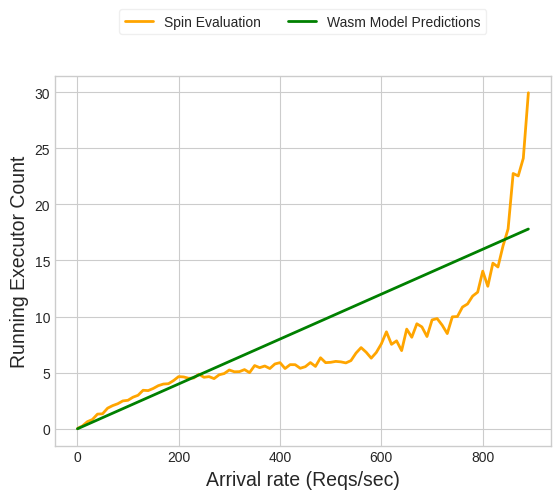

In [10]:
#plt.figure(figsize=(10, 6))
# exp_running_total = container_results["OpenWhisk"]["running_total"].values()
# model_running_total = container_results["Model"]["running_total"].values()

wasm_service_time = 0.02
spin_execs = [v["Avg_inflight_executors"] for k,v in spin_results.items()]
wasm_execs = [rate * wasm_service_time for rate in arrival_rates_wasm]

# plt.plot(arrival_rates_cont, exp_running_total, color='red', label="OpenWhisk Evaluation", linewidth=2)
# plt.plot(arrival_rates_cont, model_running_total, color='blue', label="Container Model Predictions", linewidth=2)

plt.plot(arrival_rates_wasm, spin_execs, color='orange', label="Spin Evaluation", linewidth=2)
plt.plot(arrival_rates_wasm, wasm_execs, color='green', label="Wasm Model Predictions", linewidth=2)


plt.xlabel('Arrival rate (Reqs/sec)', fontsize=14)
plt.ylabel('Running Executor Count', fontsize=14)


plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.2),
           frameon=True, framealpha=0.3)

#plt.savefig(f"figures/load_total_running_exec.png", bbox_inches = 'tight')

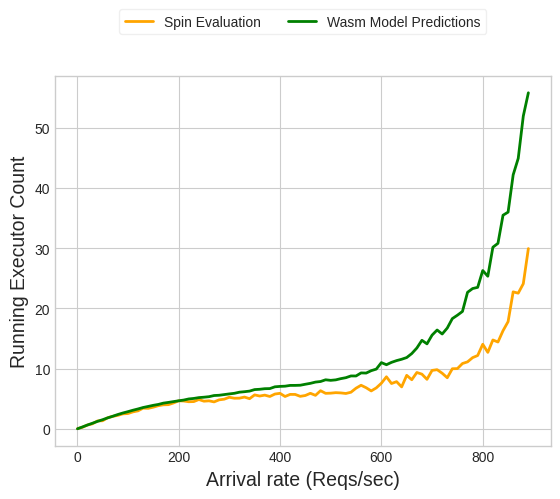

In [45]:
#plt.figure(figsize=(10, 6))
# exp_running_total = container_results["OpenWhisk"]["running_total"].values()
# model_running_total = container_results["Model"]["running_total"].values()

spin_execs = [v["Avg_inflight_executors"] for k,v in spin_results.items()]
spin_resp_times = [v["Avg_response_time"] for k,v in spin_results.items()]
wasm_execs = [rate * resp_time for rate, resp_time in zip(arrival_rates_wasm, spin_resp_times)]

# plt.plot(arrival_rates_cont, exp_running_total, color='red', label="OpenWhisk Evaluation", linewidth=2)
# plt.plot(arrival_rates_cont, model_running_total, color='blue', label="Container Model Predictions", linewidth=2)

plt.plot(arrival_rates_wasm, spin_execs, color='orange', label="Spin Evaluation", linewidth=2)
plt.plot(arrival_rates_wasm, wasm_execs, color='green', label="Wasm Model Predictions", linewidth=2)


plt.xlabel('Arrival rate (Reqs/sec)', fontsize=14)
plt.ylabel('Running Executor Count', fontsize=14)


plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.2),
           frameon=True, framealpha=0.3)

#plt.savefig(f"figures/load_total_running_exec.png", bbox_inches = 'tight')